<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/ReconocimientoPatrones/blob/master/PR_L12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconocimiento de Patrones
##Dr. Carlos Villaseñor
##Lección 12 - Introducción al aprendizaje reforzado

In [1]:
# k-armed Bandit Testbed
# Dr. Carlos Villaseñor
# 30/08/2018


# Imports
import numpy as np
import matplotlib.pyplot as plt


# Bandit class
class Bandit:
    def __init__(self, n):
        self.n = n
        self.act_vals = np.random.randn(n)
    
    def take_action(self, action):
        
        # Catch action errors
        if (action < 0) or (action >= self.n) or (type(action) != int):
            raise ValueError('Action not recognized')
            
        # Return reward with some noise  
        return np.random.randn() + self.act_vals[action]
        
    def show_action_values(self):
        return self.act_vals


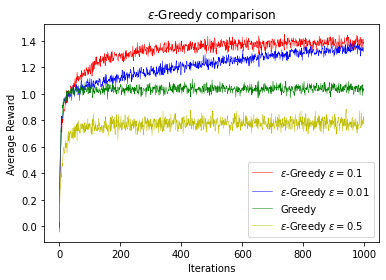

In [2]:
# Epsilon-greedy Algoritm
class epsilon_greedy:
    
    def __init__(self, num_actions, epsilon):
        
        # Number of actions
        self.num_act = num_actions
        
        # Probability of exploration
        self.eps = epsilon
        
        # Estimation of action-values
        self.Q = np.zeros(num_actions)
        
        # Action selection counter
        self.n = np.zeros(num_actions)
        

    def learn(self, reward_function, iterations=1000):
        
        self.rewards = np.zeros(iterations)
        
        # Iterations
        for i in range(iterations):
            
            # Choose with Epsilon-Greedy strategy
            rand_num = np.random.random()
            if rand_num < self.eps:
                action = int(np.random.randint(self.num_act))
            else:
                action = int(np.argmax(self.Q))
            
            # Get reward of the action
            reward = reward_function(action)
            self.rewards[i] = reward
        
            # Update estimates using the Sample-Average Incremental method
            self.n[action] += 1
            self.Q[action] += (1/self.n[action])*(reward - self.Q[action])

# Monte Carlo Simulation -----------------------------------------------------

plt.close('all')

# Number of arms
n = 10

# Number of iterations
iterations = 1000

# Number of  Monte-Carlo Simulations
MCtest = 2000

# array for saving reward record
hist_1 = np.zeros(iterations)
hist_2 = np.zeros(iterations)
hist_3 = np.zeros(iterations)
hist_4 = np.zeros(iterations)

for i in range(MCtest):
    
    # Create k-armed Bandit
    B = Bandit(n)
    
    # Create Agent with epsilon-greedy strategy
    Agent_1 = epsilon_greedy(n, 0.1)
    Agent_2 = epsilon_greedy(n, 0.01)
    Agent_3 = epsilon_greedy(n, 0.)
    Agent_4 = epsilon_greedy(n, 0.5)
    
    # Learn policy
    Agent_1.learn(B.take_action, iterations)
    Agent_2.learn(B.take_action, iterations)
    Agent_3.learn(B.take_action, iterations)
    Agent_4.learn(B.take_action, iterations)
    
    # Aggregate reward record
    hist_1  += Agent_1.rewards
    hist_2  += Agent_2.rewards
    hist_3  += Agent_3.rewards
    hist_4  += Agent_4.rewards
    
# Calculate mean reward record
hist_1 /= MCtest
hist_2 /= MCtest
hist_3 /= MCtest
hist_4 /= MCtest

# Plot result
plt.plot(hist_1 ,'-r', linewidth=0.5, label=r'$\epsilon$-Greedy $\epsilon=0.1$')
plt.plot(hist_2 ,'-b', linewidth=0.5, label=r'$\epsilon$-Greedy $\epsilon=0.01$')
plt.plot(hist_3 ,'-g', linewidth=0.5, label='Greedy')
plt.plot(hist_4 ,'-y', linewidth=0.5, label=r'$\epsilon$-Greedy $\epsilon=0.5$')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title(r'$\epsilon$-Greedy comparison')
plt.show()

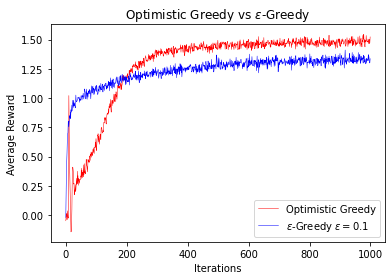

In [3]:
# Optimistic Initial Values
# Dr. Carlos Villaseñor
# 31/08/2018
# From the book of RL 2.6

# Epsilon-Greedy algorithm with constant alpha
class epsilon_greedy:
    
    def __init__(self, num_actions, epsilon):
        
        # Number of actions
        self.num_act = num_actions
        
        # Probability of exploration
        self.eps = epsilon
        
        # Estimation of values
        self.Q = np.zeros(num_actions)
            
    def learn(self, reward_function, iterations=1000, alpha=0.1):
        
        self.rewards = np.zeros(iterations)
        
        # Iterations
        for i in range(iterations):
            
            # Choose with Epsilon-Greedy strategy
            rand_num = np.random.random()
            if rand_num < self.eps:
                action = int(np.random.randint(self.num_act))
            else:
                action = int(np.argmax(self.Q))
            
            # Get reward of the action
            reward = reward_function(action)
            self.rewards[i] = reward
        
            # Update estimates using the Sample-Average Incremental method
            self.Q[action] += alpha * (reward - self.Q[action])


# Monte Carlo Simulation -----------------------------------------------------
            
plt.close('all')

# Number of arms
n = 10

# Number of iterations
iterations = 1000

# Number of  Monte-Carlo Simulations
MCtest = 2000

# array for saving reward record
hist_1 = np.zeros(iterations)
hist_2 = np.zeros(iterations)

for i in range(MCtest):
    
    # Create k-armed Bandit
    B = Bandit(n)
    
    # Create Greedy Optimistic Agent 
    Agent_1 = epsilon_greedy(n, 0)
    Agent_1.Q = np.full(n, 5.0)
    
    # Create normal eps-greedy Agent
    Agent_2 = epsilon_greedy(n, 0.1)
    
    # Learn policy
    Agent_1.learn(B.take_action, iterations)
    Agent_2.learn(B.take_action, iterations)
    
    # Aggregate reward record
    hist_1  += Agent_1.rewards
    hist_2  += Agent_2.rewards
    
# Calculate mean reward record
hist_1 /= MCtest
hist_2 /= MCtest

# Plot result
plt.plot(hist_1 ,'-r', linewidth=0.5, label='Optimistic Greedy')
plt.plot(hist_2 ,'-b', linewidth=0.5, label=r'$\epsilon$-Greedy $\epsilon=0.1$')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title(r'Optimistic Greedy vs $\epsilon$-Greedy')
plt.show()

Complete:  0.0 %
Complete:  10.0 %
Complete:  20.0 %
Complete:  30.0 %
Complete:  40.0 %
Complete:  50.0 %
Complete:  60.0 %
Complete:  70.0 %
Complete:  80.0 %
Complete:  90.0 %


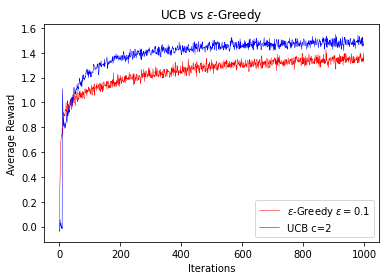

In [5]:
# Upper-Confidence-Bound vs Epsilon-Greedy
# Dr. Carlos Villaseñor
# 31/08/2018
# From the book of RL 2.7   

# Value-estimator Class
class Sample_Average_Estimator:
    def __init__(self, num_actions, initial_estimate):
        
        # Action-value estimations
        self.Q = np.full(num_actions, float(initial_estimate))
        
        # Times the action has been taken
        self.N = np.zeros(num_actions)
        
    def update(self, action, reward):
        # Incremental version of the Sample Average
        self.N[action] += 1
        self.Q[action] += (1/self.N[action])*(reward - self.Q[action])
        
    def argmax(self):
        return int(np.argmax(self.Q))

class UCB:
    
    def __init__(self, num_actions, confidence):
        
        # Number of actions
        self.num_act = num_actions
        
        # Confidence
        self.c = confidence
        
        # Estimation of values
        self.Q = np.zeros(num_actions)
        
        # Estimator 
        self.SAE = Sample_Average_Estimator(num_actions, 0.0)    
    
    def learn(self, reward_function, iterations=1000):
        
        self.rewards = np.zeros(iterations)
        
        # Iterations
        for i in range(1, iterations+1):
            
            # Calculate UCB
            best = -np.inf
            for j in range(self.num_act):
                if self.SAE.N[j] == 0:
                    action = j
                    break
                else:
                    ucb = self.SAE.Q[j] + self.c * np.sqrt(np.log(i)/self.SAE.N[j])
                    if ucb > best:
                        action = j
                        best = ucb
            
            # Get reward of the action
            reward = reward_function(action)
            self.rewards[i-1] = reward
            
            # Update estimates
            self.SAE.update(action, reward)          
            
            
# Monte Carlo Simulation -----------------------------------------------------
            
plt.close('all')

# Number of arms
n = 10

# Number of iterations
iterations = 1000

# Number of  Monte-Carlo Simulations
MCtest = 2000

# array for saving reward record
hist_1 = np.zeros(iterations)
hist_2 = np.zeros(iterations)

for i in range(MCtest):
    if i%(MCtest/10) == 0:
        print('Complete: ', i/(MCtest/100), '%')
    
    # Create k-armed Bandit
    B = Bandit(n)
    
    # Create epsilon-greedy Agent
    Agent_1 = epsilon_greedy(n, epsilon=0.1)
    
    # Create UCB Agent
    Agent_2 = UCB(n, confidence=2)
    
    # Learn policy
    Agent_1.learn(B.take_action, iterations)
    Agent_2.learn(B.take_action, iterations)
    
    # Aggregate reward record
    hist_1  += Agent_1.rewards
    hist_2  += Agent_2.rewards
    
# Calculate mean reward record
hist_1 /= MCtest
hist_2 /= MCtest

# Plot result
plt.plot(hist_1 ,'-r', linewidth=0.5, label=r'$\epsilon$-Greedy $\epsilon=0.1$')
plt.plot(hist_2 ,'-b', linewidth=0.5, label='UCB c=2')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title(r'UCB vs $\epsilon$-Greedy')
plt.show()